       director_name  num_critic_for_reviews  duration  \
0      James Cameron                   723.0     178.0   
1     Gore Verbinski                   302.0     169.0   
2         Sam Mendes                   602.0     148.0   
3  Christopher Nolan                   813.0     164.0   
4        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fant

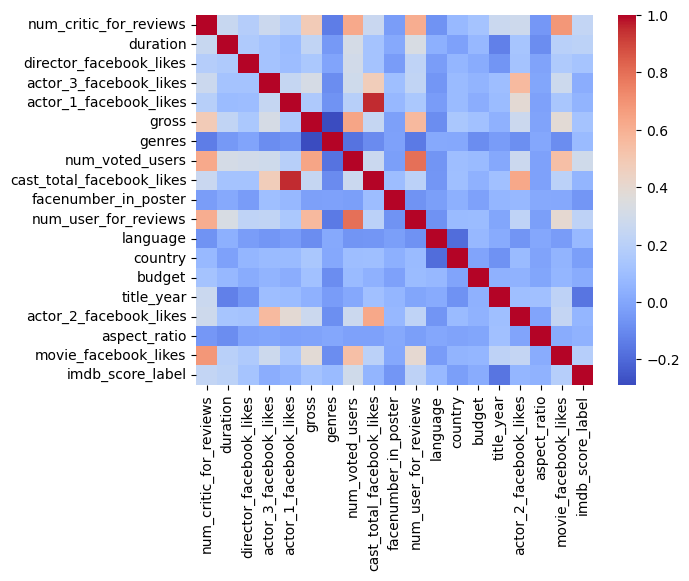

Accuracy: 0.7185332011892963
Confusion Matrix:
[[344 116]
 [168 381]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       460
           1       0.77      0.69      0.73       549

    accuracy                           0.72      1009
   macro avg       0.72      0.72      0.72      1009
weighted avg       0.72      0.72      0.72      1009



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv("/Users/yourgrandpaprogenynamesmcky/Developer/BIG_DATA_AI/HW2/Data/HW3_movie_metadata-661316-17373502460835.csv")

print(df.head())
print(df.info())
print(df.describe())
print(df.isna().sum())

df['imdb_score_label'] = (df['imdb_score'] >= 6.5).astype(int)
df.drop(columns=['imdb_score'], inplace=True)

df.fillna(df.median(numeric_only=True), inplace=True)

categorical_cols = ['genres', 'language', 'country']

label_encoder = LabelEncoder()

for col in categorical_cols:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))
    else:
        print(f"Column '{col}' not found!")

columns_to_drop = ['movie_title', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

columns_to_drop = ['movie_title', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

X = df.drop(columns=['imdb_score_label'])
y = df['imdb_score_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train_numeric)
X_test_numeric = scaler.transform(X_test_numeric)


model = LogisticRegression()
model.fit(X_train_numeric, y_train)


y_pred = model.predict(X_test_numeric)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
